# Univariate Confidence and Prediction Intervals


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed and parameters
np.random.seed(41)
mu_true = 10.0
sigma = 9.0

# Simulate data
y = np.random.normal(loc=mu_true, scale=sigma, size=300)
y_train = y[:150]
y_test = y[150:]


In [9]:
# Calculate z-value
z = norm.ppf(0.975)

# Confidence interval for mean using training set
n_train = len(y_train)
mu_hat_train = y_train.mean()
se_train = sigma / np.sqrt(n_train)
ci_lower = mu_hat_train - z * se_train
ci_upper = mu_hat_train + z * se_train

# "Prediction interval" for population mean using test set
n_test = len(y_test)
mu_hat_test = y_test.mean()
se_test = sigma / np.sqrt(n_test)
pi_mu_test_lower = mu_hat_test - z * se_test
pi_mu_test_upper = mu_hat_test + z * se_test

# Prediction interval for individual observations (train estimate)
pi_obs_lower = mu_hat_train - z * sigma * (1 + 1 / n_train) ** .5
pi_obs_upper = mu_hat_train + z * sigma * (1 + 1 / n_train) ** .5 

# Display results
print(f"Training mean estimate: {mu_hat_train:.3f}")
print(f"95% CI for population mean (train): [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"95% PI for individual obs:          [{pi_obs_lower:.3f}, {pi_obs_upper:.3f}]")


Training mean estimate: 9.297
95% CI for population mean (train): [7.856, 10.737]
95% PI for individual obs:          [-8.402, 26.995]


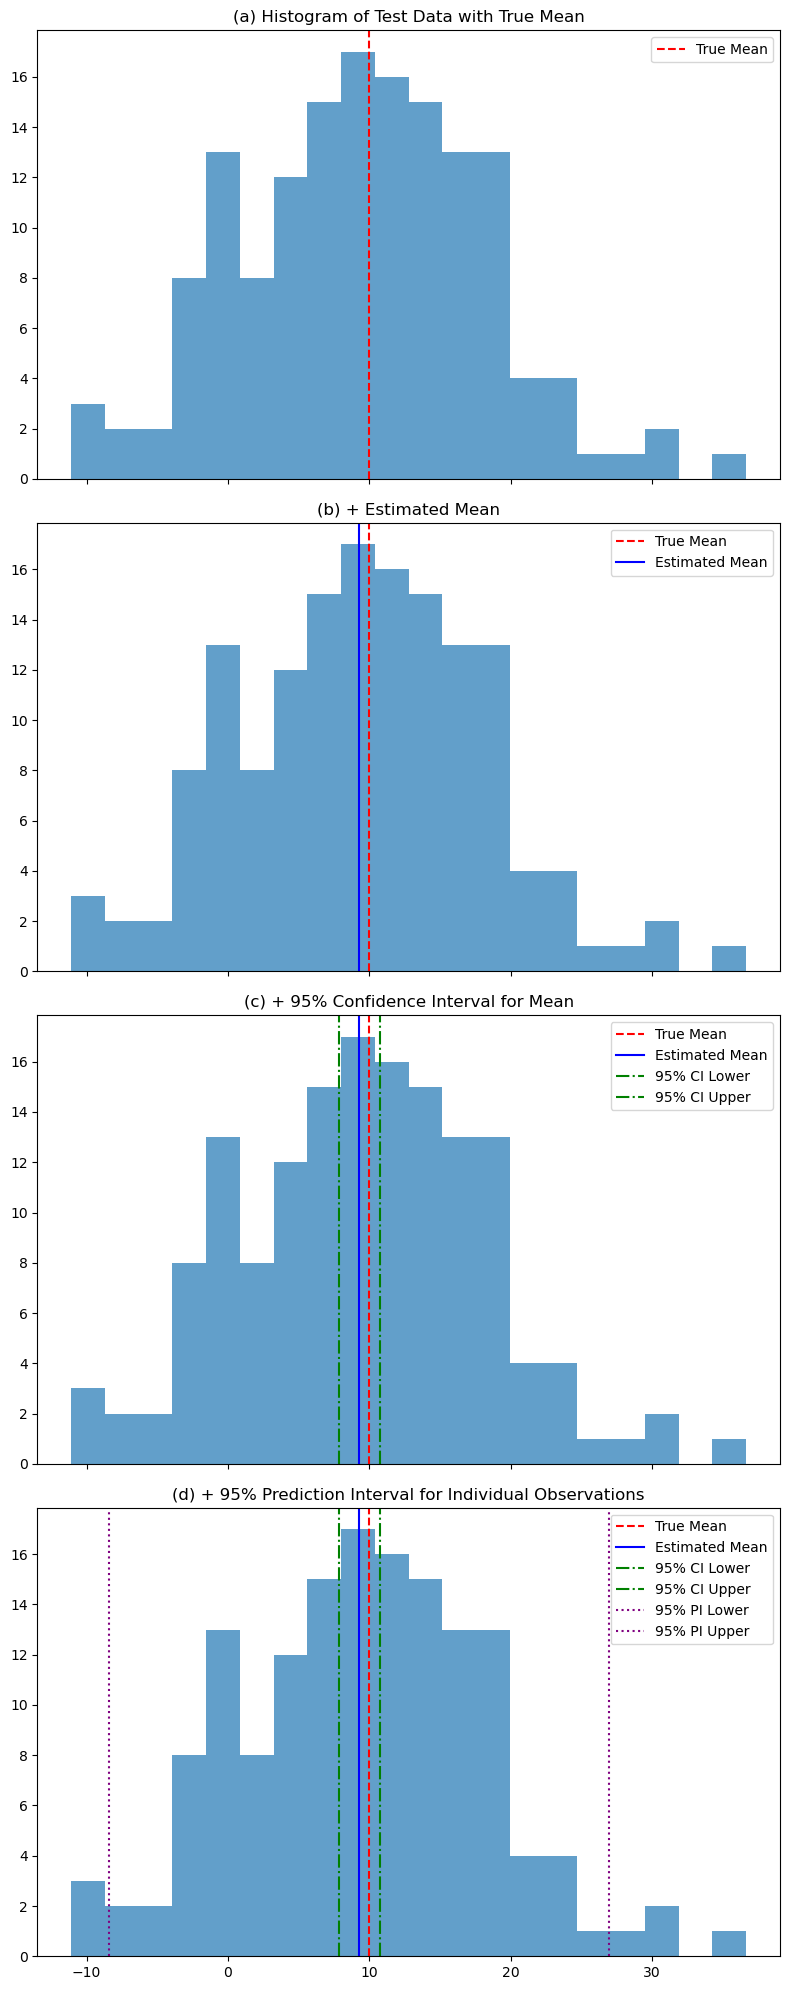

In [10]:
# Plotting vertical sequence of subplots
fig, axes = plt.subplots(4, 1, figsize=(8, 20), sharex=True)

# (a) Histogram + true mean
axes[0].hist(y_test, bins=20, alpha=0.7)
axes[0].axvline(mu_true, color='red', linestyle='--', label='True Mean')
axes[0].set_title('(a) Histogram of Test Data with True Mean')
axes[0].legend()

# (b) + estimated mean
axes[1].hist(y_test, bins=20, alpha=0.7)
axes[1].axvline(mu_true, color='red', linestyle='--', label='True Mean')
axes[1].axvline(mu_hat_train, color='blue', linestyle='-', label='Estimated Mean')
axes[1].set_title('(b) + Estimated Mean')
axes[1].legend()

# (c) + 95% CI for mean
axes[2].hist(y_test, bins=20, alpha=0.7)
axes[2].axvline(mu_true, color='red', linestyle='--', label='True Mean')
axes[2].axvline(mu_hat_train, color='blue', linestyle='-', label='Estimated Mean')
axes[2].axvline(ci_lower, color='green', linestyle='-.', label='95% CI Lower')
axes[2].axvline(ci_upper, color='green', linestyle='-.', label='95% CI Upper')
axes[2].set_title('(c) + 95% Confidence Interval for Mean')
axes[2].legend()

# (d) + 95% prediction interval for obs
axes[3].hist(y_test, bins=20, alpha=0.7)
axes[3].axvline(mu_true, color='red', linestyle='--', label='True Mean')
axes[3].axvline(mu_hat_train, color='blue', linestyle='-', label='Estimated Mean')
axes[3].axvline(ci_lower, color='green', linestyle='-.', label='95% CI Lower')
axes[3].axvline(ci_upper, color='green', linestyle='-.', label='95% CI Upper')
axes[3].axvline(pi_obs_lower, color='purple', linestyle=':', label='95% PI Lower')
axes[3].axvline(pi_obs_upper, color='purple', linestyle=':', label='95% PI Upper')
axes[3].set_title('(d) + 95% Prediction Interval for Individual Observations')
axes[3].legend()

plt.tight_layout()
plt.show()